<a href="https://colab.research.google.com/github/berryboom/dap-2024/blob/main/les05/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5. Визуализация данных

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.12.2 (main, Mar 12 2024, 08:01:18) [GCC 12.2.0]
Numpy version: 2.1.0
Matplotlib version: 3.9.2


Задача **1**

Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

* Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
* Первый график должен быть красного цвета и нарисован штрихпунктирной линией
* Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией


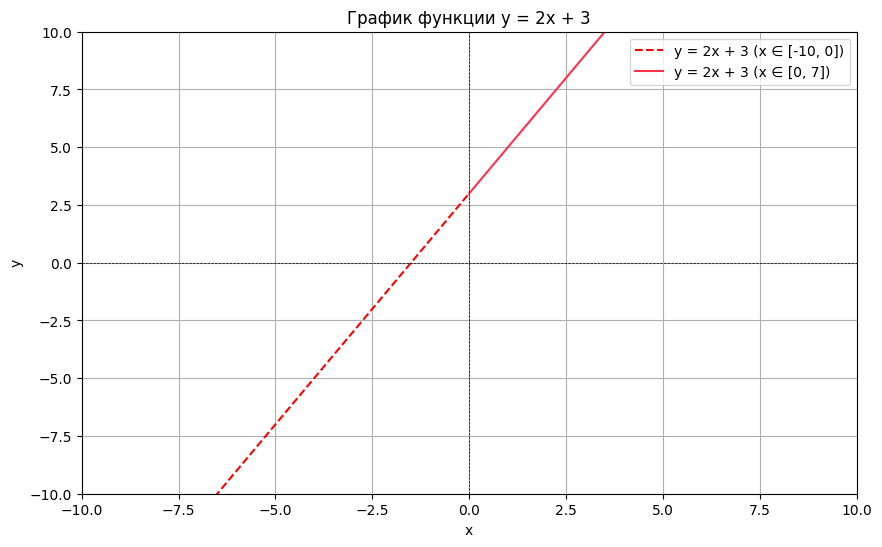

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем диапазоны для x
x1 = np.linspace(-10, 0, 100)  # Первый диапазон x = [-10, 0]
x2 = np.linspace(0, 7, 100)    # Второй диапазон x = [0, 7]

# Вычисляем значения y
y1 = 2 * x1 + 3
y2 = 2 * x2 + 3

# Создаем график
plt.figure(figsize=(10, 6))

# Первый график
plt.plot(x1, y1, color='red', linestyle='--', label='y = 2x + 3 (x ∈ [-10, 0])')

# Второй график
plt.plot(x2, y2, color=(1.0, 0.2, 0.3), linestyle='-', label='y = 2x + 3 (x ∈ [0, 7])')

# Настройка пределов осей
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Добавление подписей к осям и заголовка
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции y = 2x + 3')

# Добавление легенды
plt.legend()

# Отображение графика
plt.grid()
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.show()

Задача **2**

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

* По оси X - возврат пассажира (Age)
* По оси Y - стоимость билета (Fare)
* Для выживших пассажиров используется маркер зеленый круг (Survived)
* Для не выживших пассажиров используется маркер красный крест (Survived)
* График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

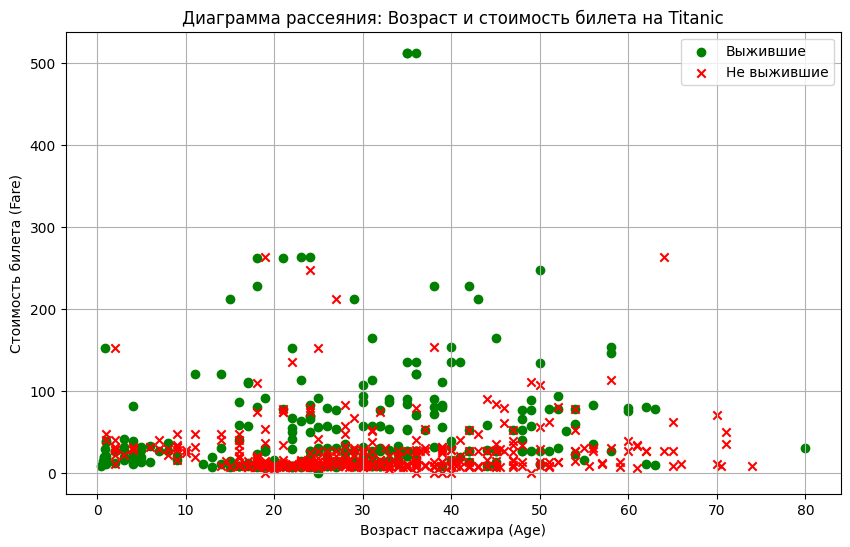

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
data = pd.read_csv('titanic.csv')

# Убираем строки с отсутствующими значениями в Age или Fare
data = data.dropna(subset=['Age', 'Fare'])

# Создаем маски для выживших и не выживших пассажиров
survived = data[data['Survived'] == 1]
not_survived = data[data['Survived'] == 0]

# Создаем график
plt.figure(figsize=(10, 6))

# Диаграмма рассеяния для выживших
plt.scatter(survived['Age'], survived['Fare'], color='green', label='Выжившие', marker='o')

# Диаграмма рассеяния для не выживших
plt.scatter(not_survived['Age'], not_survived['Fare'], color='red', label='Не выжившие', marker='x')

# Добавление подписей к осям и заголовка
plt.xlabel('Возраст пассажира (Age)')
plt.ylabel('Стоимость билета (Fare)')
plt.title('Диаграмма рассеяния: Возраст и стоимость билета на Titanic')

# Добавление легенды
plt.legend()

# Отображение графика
plt.grid()
plt.show()

Задача **3**

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы.
Для набора данных [iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

* Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
* Цвет маркеров должен зависеть от вида ирисов (iris.target)
* Графики должны иметь подписи к осям, легенду и общий заголовок

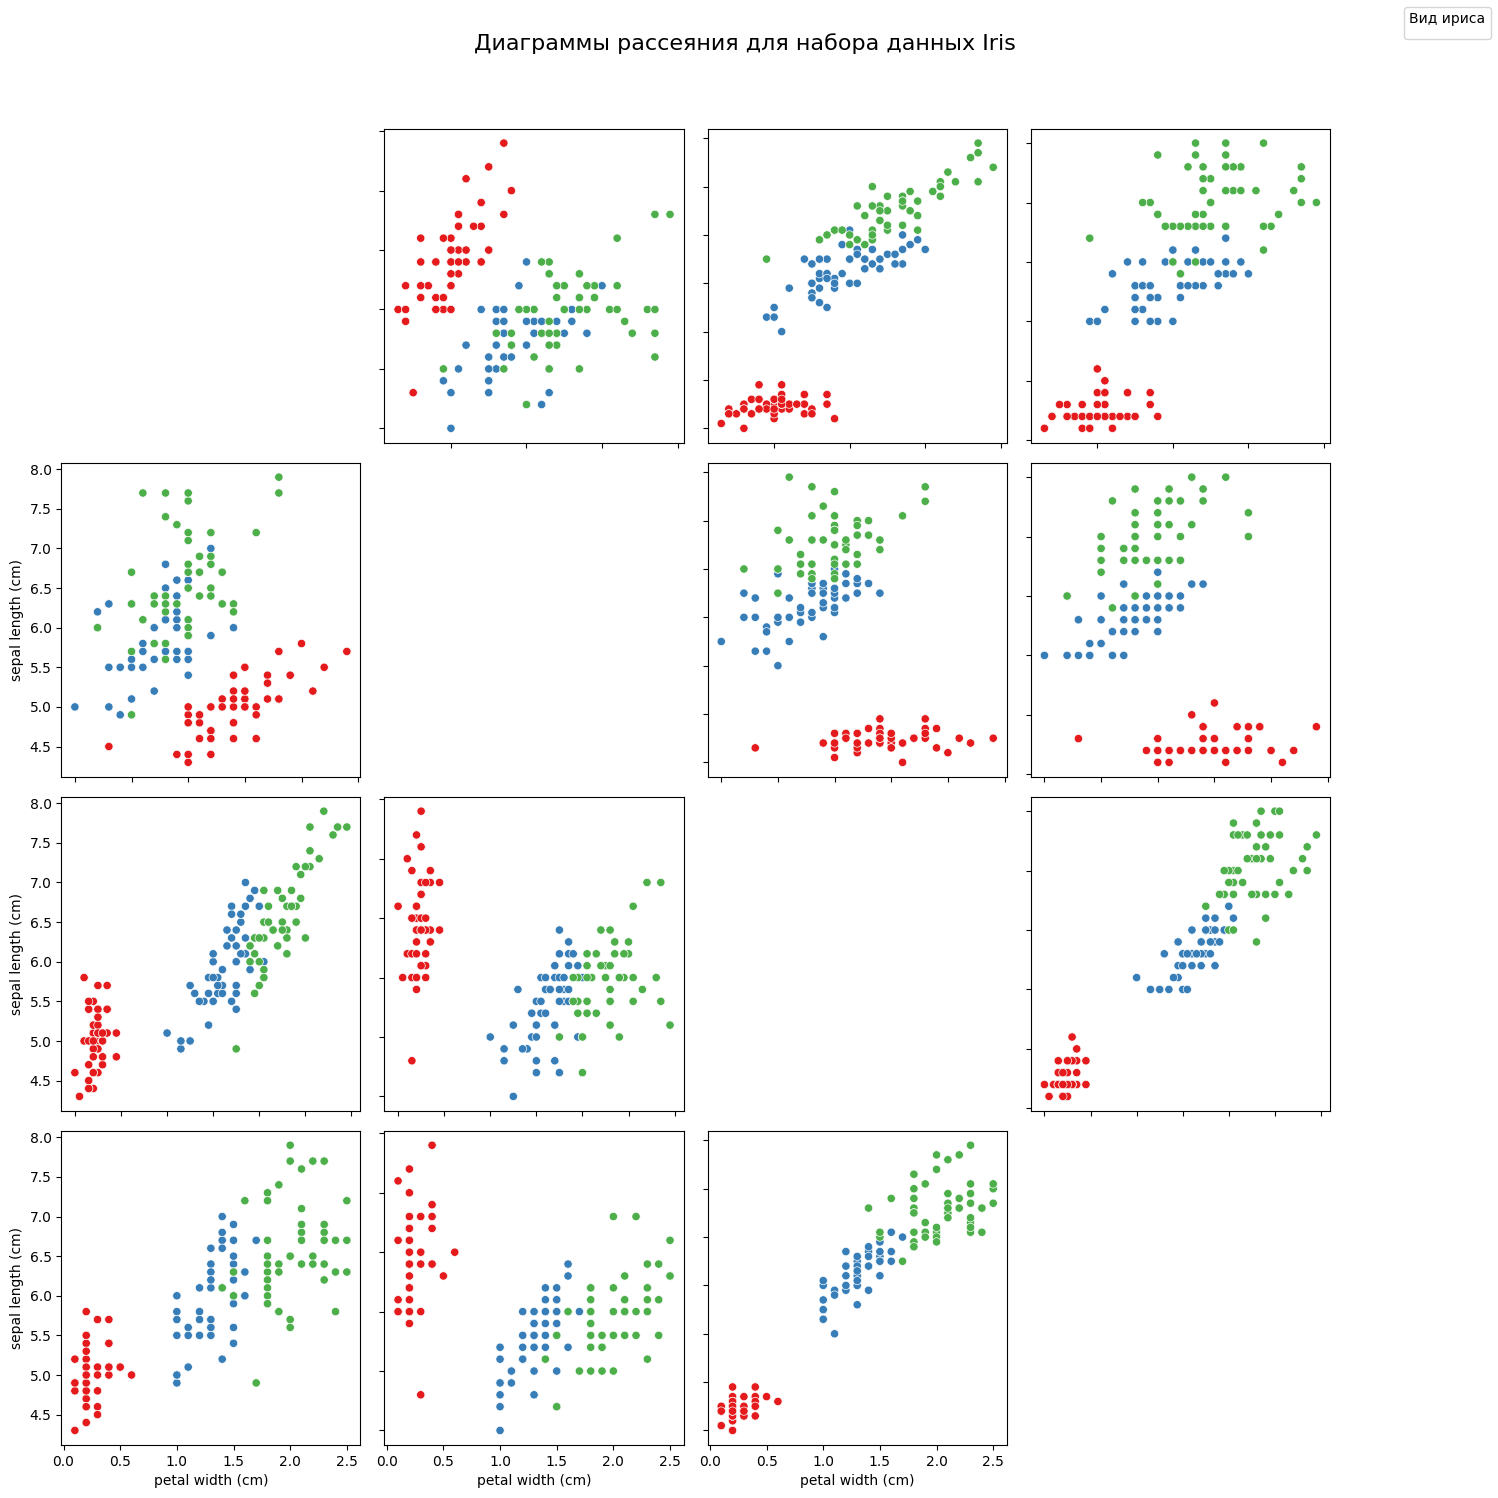

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Создаем фигуру с 16 подграфиками
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# Перебираем все пары признаков и строим диаграммы рассеяния
for i in range(len(iris.feature_names)):
    for j in range(len(iris.feature_names)):
        if i != j:
            sns.scatterplot(data=data, x=iris.feature_names[i], y=iris.feature_names[j],
                            hue='species', ax=axes[i][j], palette='Set1', legend=False)
        else:
            axes[i][j].set_visible(False)  # Скрываем диаграммы, где оси совпадают

# Добавляем общий заголовок
plt.suptitle('Диаграммы рассеяния для набора данных Iris', fontsize=16)

# Настройка подписей к осям
for ax in axes.flat:
    ax.label_outer()  # Убираем внутренние подписи

# Добавляем легенду
handles, labels = axes[0][0].get_legend_handles_labels()
fig.legend(handles, labels, title='Вид ириса', loc='upper right')

# Отображение графика
plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Увеличиваем пространство для заголовка
plt.show()

Задача **4**

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

* Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
* Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
* График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

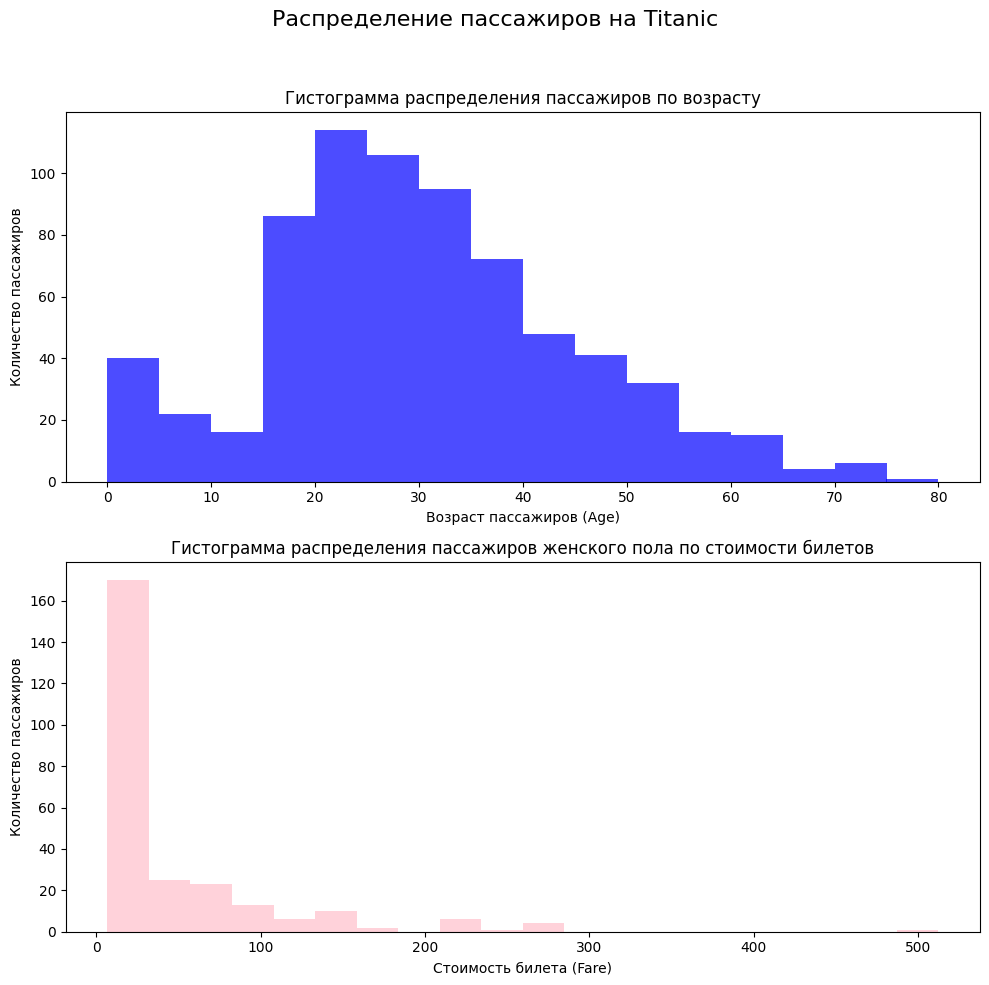

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
data = pd.read_csv('titanic.csv')

# Убираем строки с отсутствующими значениями в Age или Fare
data = data.dropna(subset=['Age', 'Fare'])

# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Гистограмма распределения пассажиров по возрасту (Age)
axes[0].hist(data['Age'], bins=range(0, 81, 5), color='blue', alpha=0.7)
axes[0].set_xlabel('Возраст пассажиров (Age)')
axes[0].set_ylabel('Количество пассажиров')
axes[0].set_title('Гистограмма распределения пассажиров по возрасту')

# Гистограмма распределения пассажиров женского пола по стоимости билетов (Fare)
female_passengers = data[data['Sex'] == 'female']
axes[1].hist(female_passengers['Fare'], bins=20, color='pink', alpha=0.7)
axes[1].set_xlabel('Стоимость билета (Fare)')
axes[1].set_ylabel('Количество пассажиров')
axes[1].set_title('Гистограмма распределения пассажиров женского пола по стоимости билетов')

# Добавление общего заголовка
plt.suptitle('Распределение пассажиров на Titanic', fontsize=16)

# Отображение графиков
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Увеличиваем пространство для заголовка
plt.show()

Задача **5**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - средняя стоимость за проезд для данного класса (Fare)
* График должен иметь подписи к осям, легенду и заголовок

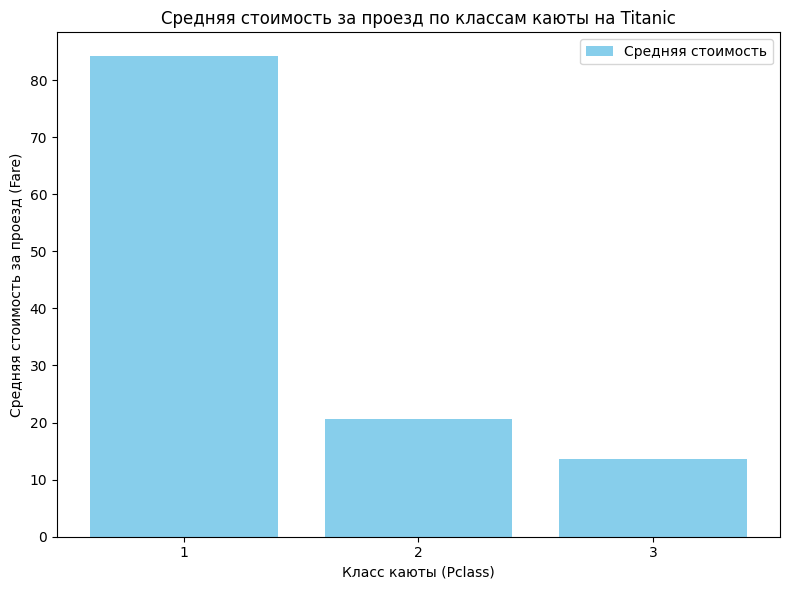

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
data = pd.read_csv('titanic.csv')

# Убираем строки с отсутствующими значениями в Fare
data = data.dropna(subset=['Fare'])

# Вычисляем среднюю стоимость проезда для каждого класса
average_fare = data.groupby('Pclass')['Fare'].mean().reset_index()

# Создаем вертикальную столбчатую диаграмму
plt.figure(figsize=(8, 6))
plt.bar(average_fare['Pclass'].astype(str), average_fare['Fare'], color='skyblue')

# Добавляем подписи к осям
plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Средняя стоимость за проезд (Fare)')
plt.title('Средняя стоимость за проезд по классам каюты на Titanic')

# Отображаем легенду, если необходимо
plt.legend(['Средняя стоимость'], loc='upper right')

# Показываем график
plt.tight_layout()
plt.show()

Задача **6**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - количество пассажиров с разбивкой по полу (Sex)
* График должен иметь подписи к осям, легенду и заголовок

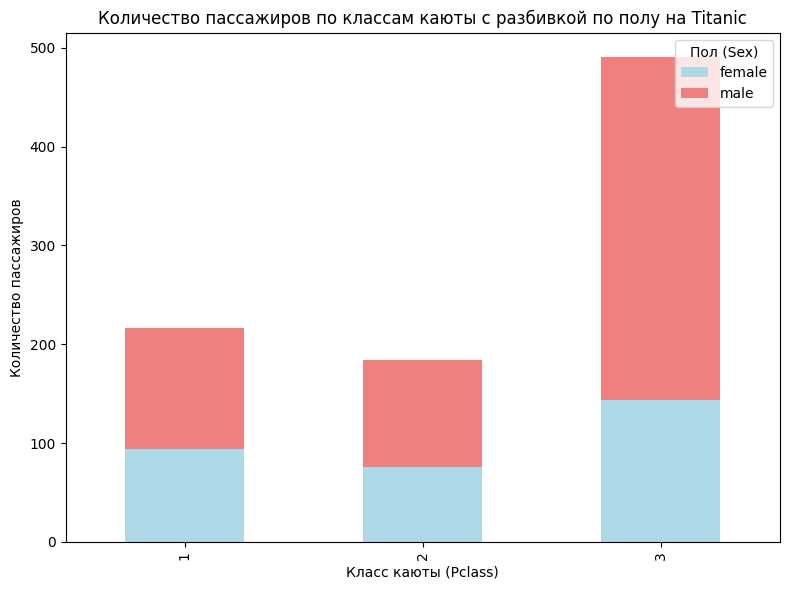

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
data = pd.read_csv('titanic.csv')

# Убираем строки с отсутствующими значениями в Pclass или Sex
data = data.dropna(subset=['Pclass', 'Sex'])

# Группируем данные по классу и полу, подсчитываем количество пассажиров
passenger_counts = data.groupby(['Pclass', 'Sex']).size().unstack()

# Создаем вертикальную накопительную столбчатую диаграмму
passenger_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'lightcoral'])

# Добавляем подписи к осям
plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Количество пассажиров')
plt.title('Количество пассажиров по классам каюты с разбивкой по полу на Titanic')

# Добавляем легенду
plt.legend(title='Пол (Sex)', loc='upper right')

# Показываем график
plt.tight_layout()
plt.show()

Задача **7**

Для набора данных iris постройте круговую диаграмму

* Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
* Сектор с максимальной долей долен быть выдвинут
* График должен иметь подписи к осям, легенду и заголовок

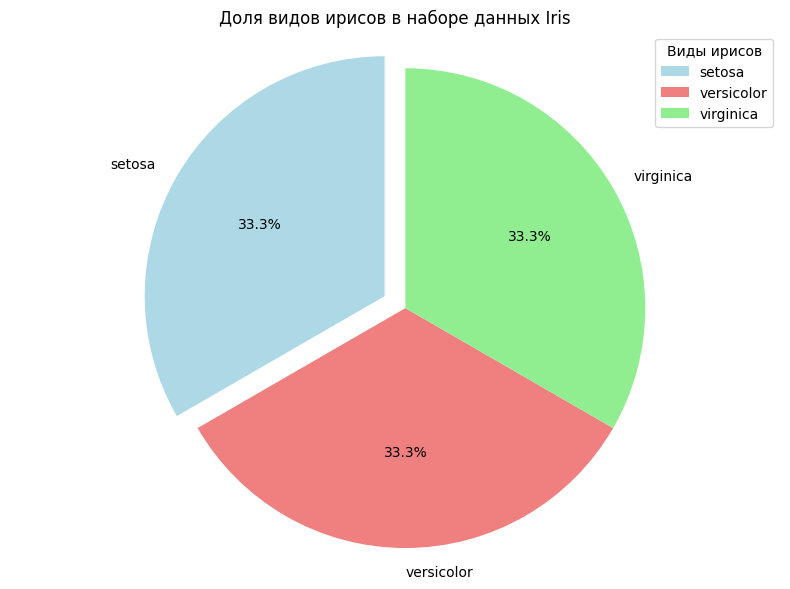

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

# Загружаем набор данных Iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Подсчитываем количество ирисов для каждого вида
species_counts = iris_df['species'].value_counts()

# Создаем круговую диаграмму
plt.figure(figsize=(8, 6))
explode = [0.1 if i == species_counts.idxmax() else 0 for i in species_counts.index]  # Выдвигаем сектор с максимальной долей
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', explode=explode, startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen'])

# Добавляем заголовок
plt.title('Доля видов ирисов в наборе данных Iris')

# Показываем легенду
plt.legend(title='Виды ирисов', loc='upper right')

# Показываем график
plt.axis('equal')  # Чтобы круговая диаграмма была кругом
plt.tight_layout()
plt.show()

Задача **8**

Использую библиотеку [Seaborn](https://seaborn.pydata.org/) постройте гистограмму для возраста пассажиров "Титаника"

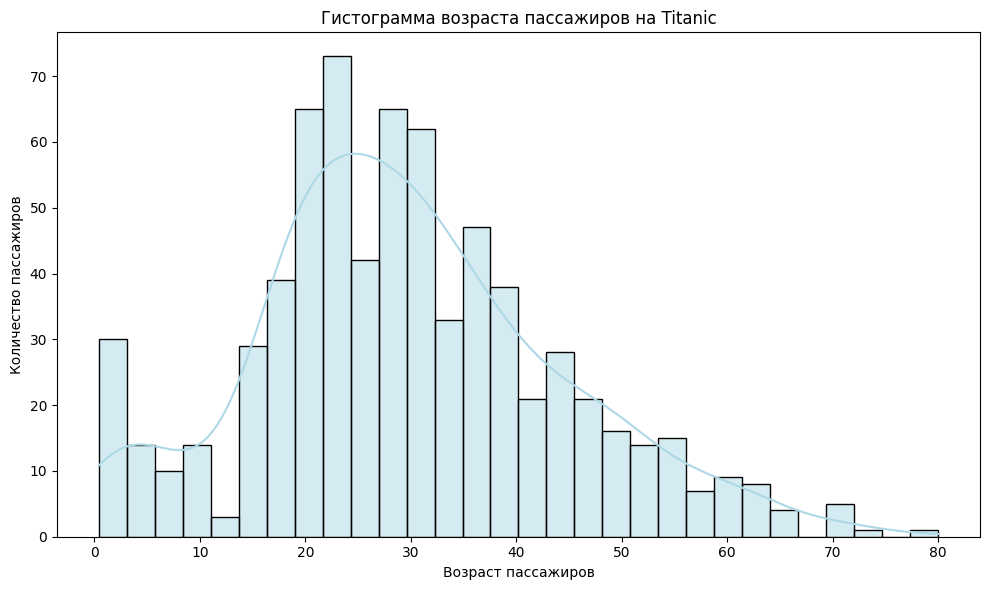

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем данные
titanic_data = pd.read_csv('titanic.csv')

# Убираем строки с отсутствующими значениями в Age
titanic_data = titanic_data.dropna(subset=['Age'])

# Создаем гистограмму для возраста пассажиров
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'], bins=30, kde=True, color='lightblue')

# Добавляем подписи к осям и заголовок
plt.xlabel('Возраст пассажиров')
plt.ylabel('Количество пассажиров')
plt.title('Гистограмма возраста пассажиров на Titanic')

# Показываем график
plt.tight_layout()
plt.show()

## Вопросы


1. Для чего используется диаграмма рассеяния?
2. Что такое гистограмма, чем он отличается от столбчатой диаграммы?
3. Как задать цвет линии в линейном графике Matplotlib?
4. Чем класс plt.Figure отличается от объекта  plt.Axes?
5. Matplotlib не позволяет управлять типом маркера scatter графика. Да или нет?
6. Matplotlib единственная библиотека для построения графиков в Python. Да или нет?
7. Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?
8. В наборе данных iris представлены 4 вида ирисов. Да или нет?
9. Для всех пассажиров "Титаника" указан возраст. Да или нет?
10. Как на одном холсте может располагаться не более 16 диаграмм, это обусловлено тем что размер диаграммы нельзя изменить и более мелкие графики попросту не будут видны.